In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy

In [2]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

In [3]:
phiprime=phi.diff(x)
phiprime

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

In [4]:
from sympy.utilities.lambdify import lambdify
u=-2*nu*(phiprime/phi)+4
ufunc=lambdify((t,x,nu),u)
ufunc(1,4,3)

3.49170664206445

In [5]:

nt=100#50
nx=101#20
dx=2*numpy.pi/(nx-1)
nu=.07#.1
dt=dx*nu#.01, why like this?

x=numpy.linspace(0,2*numpy.pi,nx)
x

#u per x at t=0 and constant nu=.1
t=0
u=numpy.asarray([ufunc(t,x0,nu) for x0 in x])
u


array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

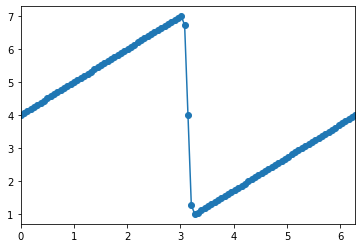

In [6]:
plt.xlim([0,2*numpy.pi])
plt.plot(x,u,marker="o")

In [7]:
un=numpy.empty(nx)
for n in range(nt):
    un=u.copy()

    
    u[1:-1]=(nu * dt / dx**2) * (un[2:] + un[0:-2] - 2*un[1:-1]) - (dt/dx)*(un[1:-1])*(un[1:-1]-un[0:-2]) + un[1:-1]
        
        #***initial condition and boundary condition***
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
        (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
u_analytical=numpy.asarray([ufunc(nt*dt,xi,nu) for xi in x])



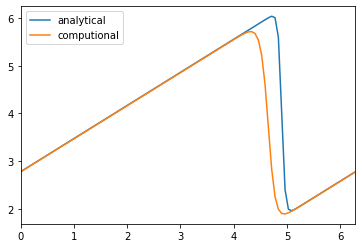

In [8]:
plt.plot(x,u_analytical,label="analytical")
plt.plot(x,u,label="computional")
plt.xlim([0,2*numpy.pi])
plt.legend()